Install and import neccersary packages

In [2]:
!pip install pandas
!pip install nltk
!pip install stop-words
!pip install -q tensorflow-text
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import IPython.display as display
import matplotlib.pyplot as plt
import math
import random
import time as time
from transformers import BertTokenizerFast, TFBertModel, TFBertPreTrainedModel, TFBertMainLayer
from tensorflow import keras
import pathlib
import jsonlines
from transformers import AutoTokenizer, AutoModelWithLMHead, TFAutoModelWithLMHead, TFAutoModel
import re
import itertools
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import pandas as pd
from official.nlp import optimization
import tensorflow_hub as hub
import tensorflow_text as text
import random

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1


In [4]:
df = pd.read_json('NQAltered.json')
df['answer'] = df['answer'].astype('float32')
df.head()

id                                                url  \
0 -7192501076945116903  https://en.wikipedia.org//w/index.php?title=Mi...   
1  4515227776076825962  https://en.wikipedia.org//w/index.php?title=Re...   
2  1744559614254480616  https://en.wikipedia.org//w/index.php?title=Po...   
3  1769260702241487320  https://en.wikipedia.org//w/index.php?title=Is...   
4 -6150633611189338412  https://en.wikipedia.org//w/index.php?title=Tu...   

                                       question_text  \
0     who plays mike in how to lose a guy in 10 days   
1  disorders of the reproductive system male and ...   
2  what major event challenged the universal powe...   
3   where does the isle of wight festival take place   
4    afrojack & martin garrix - turn up the speakers   

                                       original_text  answer    answer_loc  
0  Mike Bassett : England Manager - wikipedia <H1...     1.0  [1561, 1733]  
1  Reproductive system disease - wikipedia <H1> R...     0.0      [-1, -1]  
2  Pope - wikipedia <H1> Pope </H1> Jump to : nav...     0.0      [-1, -1]  
3  Isle of Wight Festival - wikipedia <H1> Isle o...     1.0    [113, 151]  
4  Turn Up the Speakers - Wikipedia <H1> Turn Up ...     0.0      [-1, -1]

In [5]:
df.head()

id                                                url  \
0 -7192501076945116903  https://en.wikipedia.org//w/index.php?title=Mi...   
1  4515227776076825962  https://en.wikipedia.org//w/index.php?title=Re...   
2  1744559614254480616  https://en.wikipedia.org//w/index.php?title=Po...   
3  1769260702241487320  https://en.wikipedia.org//w/index.php?title=Is...   
4 -6150633611189338412  https://en.wikipedia.org//w/index.php?title=Tu...   

                                       question_text  \
0     who plays mike in how to lose a guy in 10 days   
1  disorders of the reproductive system male and ...   
2  what major event challenged the universal powe...   
3   where does the isle of wight festival take place   
4    afrojack & martin garrix - turn up the speakers   

                                       original_text  answer    answer_loc  
0  Mike Bassett : England Manager - wikipedia <H1...     1.0  [1561, 1733]  
1  Reproductive system disease - wikipedia <H1> R...     0.0      [-1, -1]  
2  Pope - wikipedia <H1> Pope </H1> Jump to : nav...     0.0      [-1, -1]  
3  Isle of Wight Festival - wikipedia <H1> Isle o...     1.0    [113, 151]  
4  Turn Up the Speakers - Wikipedia <H1> Turn Up ...     0.0      [-1, -1]

Training class example, contains one positive and one negative instance or 2 negative instances if no answer

In [6]:
class Example():

  def __init__(self, data_point):

    # Key information from the original data
    self.orig_text = data_point["original_text"]
    self.url = data_point["url"]
    self.id = data_point["id"]
    self.question_text = data_point["question_text"]
    self.answer = data_point["answer"]
    self.answer_loc = data_point["answer_loc"]
    self.split_text = data_point["original_text"].split(" ")
    self.split_question = data_point["question_text"].split(" ")


    
    # Create two mini_examples, either both no answer, or one answer and the other no answer
    # If there is no answer, select random starts for both examples
    num_tokens = 3
    size = 200 - len(self.split_question) - num_tokens
    if self.answer_loc[0] <= -1:
      if len(self.split_text) < 200:
        start1 = 10
      else:
        start1 = random.randint(0, len(self.split_text)-200)
      ans1 = 0.0
      
    # If there is an answer, make the answer in one example and the other example random
    else:
      # Correct example
      start1 = random.randint(self.answer_loc[0]-100, self.answer_loc[0])
      ans1 = 1.0
      if start1 < 0:
        start1 = 0

    # Create the final mini_examples in form of numpy matrix to be fed in to BERT
    self.mini_text_examples = np.array((self.split_text[start1:start1+size])).reshape(1, -1)
    self.questions = np.full((1, len(self.split_question)), self.split_question)

    self.labels = np.array(([ans1]), dtype="float32")

In [7]:
z = 40000
rows = []
for index, row in df.iloc[:z, :].iterrows():
    exp = Example(row)
    rows.append([exp.questions[0, :], exp.mini_text_examples[:],  exp.labels[0]])
random.shuffle(rows)
df2 = pd.DataFrame(rows, columns=["questions", "text", "labels"])
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
df2.head()

questions  \
0     [how, many, seats, did, labour, win, in, 2015]   
1  [how, many, episodes, in, the, bletchley, circ...   
2     [can, a, wife, have, more, than, one, husband]   
3  [who, played, agent, whiskey, in, kingsman, th...   
4  [where, does, place, beyond, the, pines, take,...   

                                                text  labels  
0  [[</H1>, Jump, to, :, navigation, ,, search, <...     1.0  
1  [[The, Bletchley, circle, -, wikipedia, <H1>, ...     1.0  
2  [[of, Florida, </Li>, <Li>, Jump, up, ^, Stark...     0.0  
3  [[Target, exclusive, gift, set, includes, four...     0.0  
4  [[reading, </Li>, <Li>, 6, External, links, </...     1.0

In [8]:
# map to the expected input to TFBertForSequenceClassification, see here 
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label
  # prepare list, so that we can build up final TensorFlow dataset from slices.
input_ids_list = []
token_type_ids_list = []
attention_mask_list = []
label_list = []

for index, row in df2.iterrows():
    question, text, labels = " ".join(row["questions"]), " ".join(row["text"][0]), row["labels"]
    bert_input = bert_input = tokenizer.encode_plus(
                        question,
                        text,
                        add_special_tokens = True, # add [CLS], [SEP]
                        max_length = 500, # max length of the text that can go to BERT
                        pad_to_max_length = True, # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
              )
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([labels])
train_dataset = tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)
valds = train_dataset.take(2500)
trainds = train_dataset.skip(2500)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2136: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [9]:
class TFBertModel(TFBertPreTrainedModel):
    def __init__(self, config, *inputs, **kwargs):
        super().__init__(config, *inputs, **kwargs)

        # Base Bert model
        self.bert = TFBertMainLayer(config, name="bert")

        self.classif_answer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs, **kwargs):

        # Call base Bert model
        outputs = self.bert(inputs, **kwargs)
        sequence_output = outputs[0]
        batch_outputs = outputs[1]

        # Classification to predict if no answer (1) or answer (0)
        classification = self.classif_answer(batch_outputs)

        return classification

In [10]:
model = TFBertModel.from_pretrained('bert-base-uncased')
model.bert.trainable = True

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['dense']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
trainds = trainds.cache().batch(8)
valds = valds.cache().batch(8)

In [12]:
epochs = 2
num_train_steps = 3000
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metrics = tf.keras.metrics.BinaryAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=[keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

INFO:absl:using Adamw optimizer


In [13]:
history = model.fit(trainds, steps_per_epoch=1500, validation_data=valds, epochs=epochs, shuffle=False, verbose=1)

Epoch 1/2
1500/1500 [==============================] - 14234s 9s/step - loss: 0.3639 - binary_accuracy: 0.8356 - precision: 0.8065 - recall: 0.8734 - val_loss: 0.2689 - val_binary_accuracy: 0.8924 - val_precision: 0.8598 - val_recall: 0.9288
Epoch 2/2
1500/1500 [==============================] - 14138s 9s/step - loss: 0.2591 - binary_accuracy: 0.8926 - precision: 0.8728 - recall: 0.9142 - val_loss: 0.2499 - val_binary_accuracy: 0.8952 - val_precision: 0.8562 - val_recall: 0.9412


In [14]:
model.evaluate(valds)

313/313 [==============================] - 856s 3s/step - loss: 0.2499 - binary_accuracy: 0.8952 - precision: 0.8562 - recall: 0.9412


[0.24989816546440125,
 0.8952000141143799,
 0.8561747074127197,
 0.9412251710891724]

In [15]:
model.save_weights("Checkpoints/modelB1")

In [19]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall'])


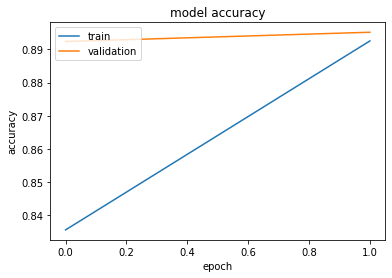

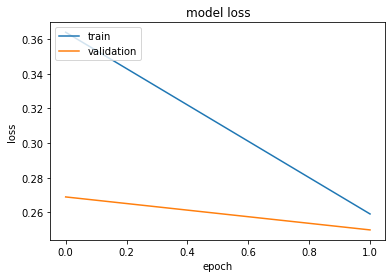

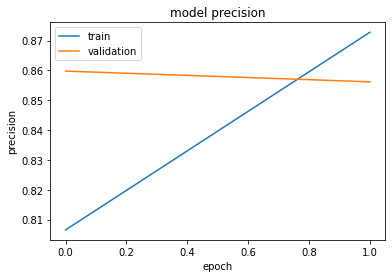

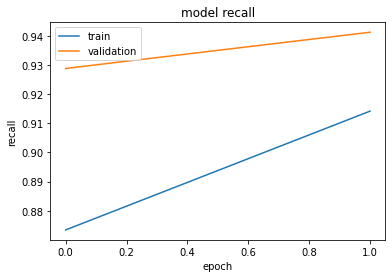

In [23]:
#  "Accuracy"
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
temp = valds.skip(1).take(1)
a = model.predict(temp)

In [55]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [56]:
for X, y in temp:
    print(y)
    for row in X["input_ids"]:
        print(remove_html_tags(" ".join(tokenizer.convert_ids_to_tokens(row))).replace(" [PAD]", ""))
        print("\n\n-------")

tf.Tensor(
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]], shape=(8, 1), dtype=float32)
[CLS] when was the last time wikipedia was updated [SEP] template : last updated - wikipedia  template : last updated  jump to : navigation , search  last updated : 2017 - 11 - 05  template documentation ( view ) ( edit ) ( history ) ( purge )  usage ( edit )   principally intended for use on user pages , but can also be of some use on wikipedia - names ##pace ( policy , project , etc . ) and portal pages . not intended for use on articles .   to suppress the ` ` last update : ' ' text , use date ##on ##ly = yes :    ( ( last updated date ##on ##ly = yes ) ) thai tube    render ##s as :    2017 - 11 - 05    to link the date so that it auto ##form ##ats ( e . g . into international or us instead of unix - style dates ) for users with date preferences set , use format = yes . note that if the template is substituted , bot ##s may remove this linking , per w ##p : mo ##sun ##link ##dates . :   [SEP]


In [39]:
print(np.round(a, 3))

[[0.99]
 [0.99]
 [0.  ]
 [0.02]
 [0.8 ]
 [0.01]
 [0.02]
 [0.68]]
